In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from FM.american_option import American_Option

In [3]:
df = pd.read_csv('market_data.csv')

K = 100
r = 0.02
sigma = 0.2
T_expiry = 1.0

early_exercise_days_put = []
early_exercise_days_call = []

In [4]:
print("Analyzing optimal exercise strategy for American Options...")

for index, row in df.iterrows():
    t = row['Time']
    St = row['Price']

    T_remaining = T_expiry - t
    if T_remaining <= 0.001:
        break

    intrnsic_put = max(K - St, 0)
    am_put = American_Option(St, K, T_remaining, r, sigma)
    put_price = am_put.longstaff_schwartz_price(option_type='put', n_simulations=5000)

    if intrnsic_put > 0 and put_price <= intrnsic_put + 0.05:
        early_exercise_days_put.append(t)

    intrnsic_call = max(St - K, 0)
    am_call = American_Option(St, K, T_remaining, r, sigma)
    call_price = am_call.longstaff_schwartz_price(option_type='call', n_simulations=5000)

    if intrnsic_call > 0 and call_price <= intrnsic_call + 0.05:
        early_exercise_days_call.append(t)

print("Analysis complete.")
print(f"Put Early Exercise Days: {early_exercise_days_put}")
print(f"Call Early Exercise Days: {early_exercise_days_call}")

Analyzing optimal exercise strategy for American Options...
Analysis complete.
Put Early Exercise Days: []
Call Early Exercise Days: [np.float64(0.958), np.float64(0.97), np.float64(0.974), np.float64(0.976), np.float64(0.996), np.float64(0.998)]


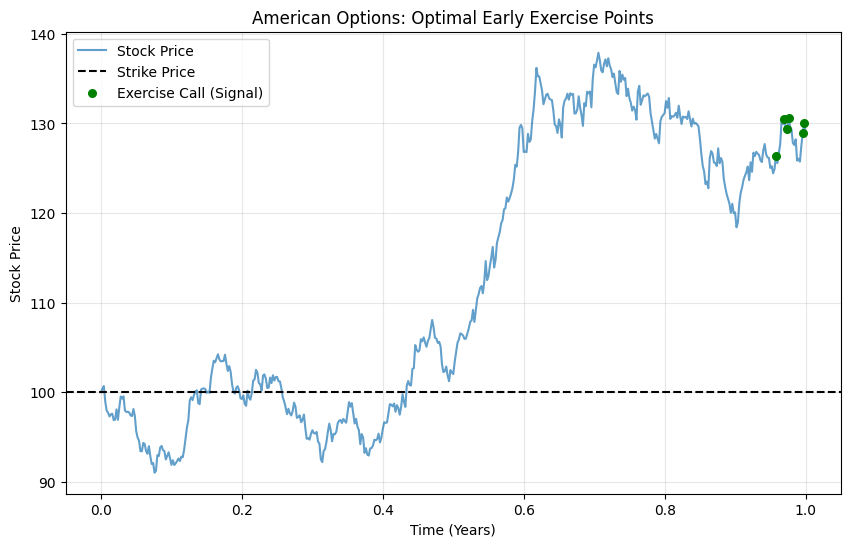

In [6]:
plt.figure(figsize=(10, 6))

plt.plot(df['Time'], df['Price'], label='Stock Price', color='tab:blue', alpha=0.7)
plt.axhline(K, color='k', linestyle='--', label='Strike Price')

if len(early_exercise_days_put) > 0:

    try:
        ex_points = df.loc[early_exercise_days_put]
    except KeyError:
        ex_points = df[df['Time'].isin(early_exercise_days_put)]
        
    plt.scatter(ex_points['Time'], ex_points['Price'], 
                color='red', s=30, zorder=5, label='Exercise Put (Signal)')

if len(early_exercise_days_call) > 0:
    try:
        ex_points = df.loc[early_exercise_days_call]
    except KeyError:
        ex_points = df[df['Time'].isin(early_exercise_days_call)]
        
    plt.scatter(ex_points['Time'], ex_points['Price'], 
                color='green', s=30, zorder=5, label='Exercise Call (Signal)')

plt.title('American Options: Optimal Early Exercise Points')
plt.xlabel('Time (Years)')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()